In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# I am going to focus on the last five years

def historicalMarketRate(stock):
    """ Calculates the historical average annual return of a stock
        uses the last 10 years as a reference"""

    year_starts = ['2011-01-03','2012-01-03','2013-01-02','2014-01-02','2015-01-02',
        '2016-01-04','2017-01-03','2018-01-02','2019-01-02','2020-01-02','2021-01-04']
   
    historical = stock.history(start = '2011-01-01', end = '2021-01-10')
    
    sum = 0
    count = 0
    for i in range(10):
        year_return = (historical.loc[year_starts[i+1]]['Close'] - historical.loc[year_starts[i]]['Close']) / historical.loc[year_starts[i]]['Close']
        sum = sum + year_return
        count = count + 1
    
    return sum / count

def covariance(stock1, stock2):
    """Finds the covariance of two stocks using their means in the period"""
    stock1_close = stock1.history(period = '5y')['Close']
    stock1_close_mean = stock1_close.mean()

    stock2_close = stock2.history(period = '5y')['Close']
    stock2_close_mean = stock2_close.mean()
    sum = 0
    count = 0

    for i in range(len(stock1_close)):
        sum = sum + (stock1_close[i] - stock1_close_mean)*(stock2_close[i] - stock2_close_mean)
        count = count + 1

    return sum / (count - 1)

def variance(stock):
    """Finds the variance of a stock using its mean in the period"""
    stock_close = stock.history(period = '5y')['Close']
    stock_close_mean = stock_close.mean()
    sum = 0
    count = 0

    for entry in stock_close:
        sum = sum + (entry-stock_close_mean)**2
        count = count + 1

    return sum / (count - 1)

def beta(stock):
    sp500 = yf.Ticker("^GSPC")
    return covariance(stock, sp500) / variance(sp500)

def riskfreerate(stock):
    return stock.history(period = '10y')['Close'].mean()/100

def expectedReturn(stock):
    tbill = yf.Ticker("^TNX")
    sp500 = yf.Ticker("^GSPC")
    rf = riskfreerate(tbill)
    rm = historicalMarketRate(sp500)
    stock_beta = beta(stock)
    return rf + stock_beta*(rm - rf)

def riskReturnPortfolio(stock1, stock2):
    stock1_ER = expectedReturn(stock1)
    stock2_ER = expectedReturn(stock2)
    stock1_var = variance(stock1)
    stock2_var = variance(stock2)
    stock_cov = covariance(stock1, stock2)

    stock1_weight = []
    stock2_weight = []
    portfolio_return = []
    portfolio_risk = []

    for i in np.arange(0,1.01,0.01):
        stock1_weight.append(i)
        stock2_weight.append(1-i)
        er = stock1_ER*i + stock2_ER*(1-i)
        risk = (i**2) * stock1_var + ((1-i)**2) * stock2_var + 2 * i * (1-i) * stock_cov 
        portfolio_return.append(er)
        portfolio_risk.append(risk)

    data_dict = {'stock1_weight':stock1_weight, 'stock2_weight':stock2_weight, 
        'portfolio_return':portfolio_return, 'portfolio_risk':portfolio_risk}

    return pd.DataFrame(data_dict)   


sp500 = yf.Ticker("^GSPC")
amzn = yf.Ticker("AMZN")
nflx = yf.Ticker("NFLX")
tbill = yf.Ticker("^TNX")

#portfolio = riskReturnPortfolio(nflx, amzn)
#print(portfolio)

print(variance(nflx))
print(variance(amzn))
print(beta(nflx))

18324.553601137617
696105.371058987
0.22479872889037553


In [2]:
portfolio = riskReturnPortfolio(nflx, amzn)


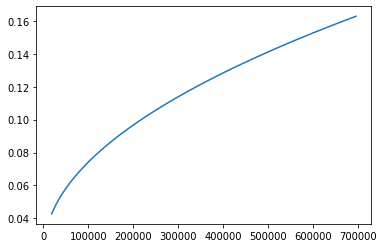

In [3]:
plt.plot(portfolio['portfolio_risk'], portfolio['portfolio_return'])